In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from tqdm import tqdm
import warnings
from pprint import pprint

In [312]:
data = pd.read_csv("./data.csv")

In [313]:
data.shape

(9691, 61)

In [314]:
y1 = data["statsbomb_xg"]
y2 = data["is_goal"]
X = data.drop(["statsbomb_xg", "is_goal", "end_location_x", "end_location_y"], axis=1)
position_columns = [col for col in data.columns if col.startswith("position")]
technique_columns = [col for col in data.columns if col.startswith("technique")]
X = X.drop(position_columns + technique_columns, axis=1)

In [315]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   period                       9691 non-null   int64  
 1   minute                       9691 non-null   int64  
 2   possession                   9691 non-null   int64  
 3   location_x                   9691 non-null   float64
 4   location_y                   9691 non-null   float64
 5   duration                     9691 non-null   float64
 6   first_time                   9691 non-null   bool   
 7   open_goal                    9691 non-null   bool   
 8   one_on_one                   9691 non-null   bool   
 9   play_pattern_From Corner     9691 non-null   bool   
 10  play_pattern_From Counter    9691 non-null   bool   
 11  play_pattern_From Free Kick  9691 non-null   bool   
 12  play_pattern_From Goal Kick  9691 non-null   bool   
 13  play_pattern_From 

In [316]:
def preprocess_continuous(X, y):
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

    return X_train, X_test, y_train, y_test

In [317]:
def preprocess_classifier(X, y):
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

    X_train, y_train = SMOTE().fit_resample(X_train, y_train)

    return X_train, X_test, y_train, y_test

In [318]:
def calculate_errors(results_test, results_pred, name):
    mae = mean_absolute_error(results_test, results_pred)
    rmse = root_mean_squared_error(results_test, results_pred)
    r2 = r2_score(results_test, results_pred)
    print(f"\n{name}")
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)
    print("R-squared (R2 Score):", r2)

In [319]:
def calculate_stats(results_test, results_pred, name):
    cm = confusion_matrix(results_test, results_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not a goal", "Goal"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ({name})')
    plt.show()

    print(f"\n{name}")
    accuracy = accuracy_score(results_test, results_pred)
    precision = precision_score(results_test, results_pred)
    recall = recall_score(results_test, results_pred)
    f1 = f1_score(results_test, results_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)

In [320]:
def linear_regression():
    linear_r = LinearRegression()
    linear_r.fit(X_train, y_train)
    y_pred = linear_r.predict(X_test)

    calculate_errors(y_test, y_pred, "Linear Regression")

    print(pd.DataFrame(linear_r.coef_,
             X.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=True))

    return y_pred

In [321]:
def logistic_regression():
    logistic_r = LogisticRegression()
    logistic_r.fit(X_train, y_train)
    y_pred = logistic_r.predict(X_test)

    calculate_stats(y_test, y_pred, "Logistic Regression")

    return logistic_r.predict_proba(X_test)

In [322]:
def decision_tree():
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    calculate_stats(y_test, y_pred, "Decision Tree")

    return dt.predict_proba(X_test)

In [323]:
def gradient_boosted_tree():
    gbt = GradientBoostingClassifier()
    gbt.fit(X_train, y_train)
    y_pred = gbt.predict(X_test)

    calculate_stats(y_test, y_pred, "Gradient Boosted Tree")

    return gbt.predict_proba(X_test)

In [324]:
X_train, X_test, y_train, y_test = preprocess_continuous(X, y1)
lr_xg = linear_regression()


Linear Regression
Mean Absolute Error: 0.05759666232295948
Root Mean Squared Error: 0.09420728000347081
R-squared (R2 Score): 0.6612688837196712
                                     coef
play_pattern_Regular Play   -1.618800e+12
play_pattern_From Free Kick -1.488750e+12
body_part_Right Foot        -1.441253e+12
play_pattern_From Throw In  -1.345763e+12
body_part_Left Foot         -1.320729e+12
play_pattern_From Corner    -1.319930e+12
body_part_Head              -1.098364e+12
play_pattern_From Counter   -7.099195e+11
play_pattern_From Goal Kick -6.567076e+11
play_pattern_Other          -5.129191e+11
play_pattern_From Keeper    -4.894211e+11
play_pattern_From Kick Off  -3.749264e+11
type_Open Play              -3.400481e+11
type_Free Kick              -2.877575e+11
type_Penalty                -1.884524e+11
body_part_Other             -1.680816e+11
type_Corner                 -3.289243e+10
possession                  -4.058481e-03
period                      -2.749002e-03
duration      

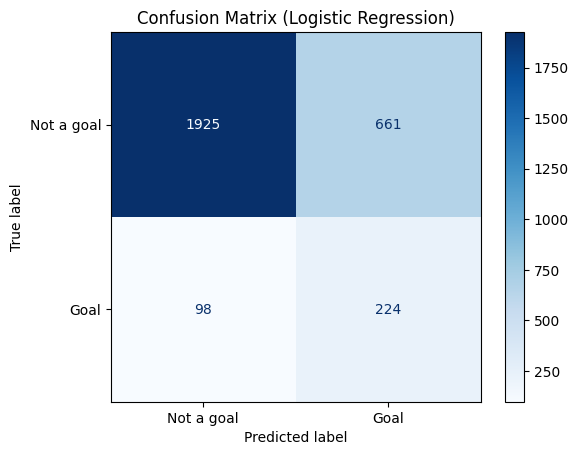


Logistic Regression
Accuracy: 0.7389958734525447
Precision: 0.25310734463276835
Recall: 0.6956521739130435
F1: 0.3711681855840928


In [325]:
X_train, X_test, y_train, y_test = preprocess_classifier(X, y2)
lor_xg = logistic_regression()

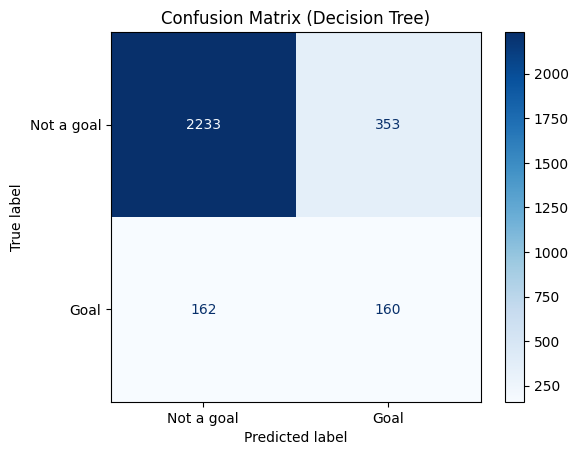


Decision Tree
Accuracy: 0.8229023383768913
Precision: 0.31189083820662766
Recall: 0.4968944099378882
F1: 0.38323353293413176


In [326]:
dt_xg = decision_tree()

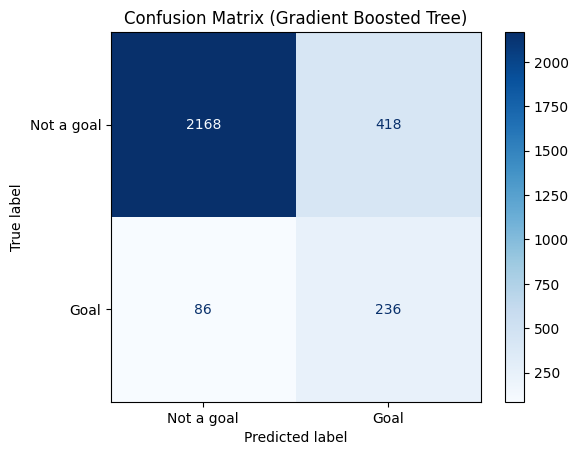


Gradient Boosted Tree
Accuracy: 0.8266850068775791
Precision: 0.36085626911314983
Recall: 0.7329192546583851
F1: 0.48360655737704916


In [327]:
gbt_xg = gradient_boosted_tree()

In [328]:
_, _, _, sxg = preprocess_continuous(X, y1)
df = pd.DataFrame({"lr_xg": lr_xg, "lor_xg": [x[1] for x in lor_xg], "dt_xg": [x[1] for x in dt_xg], "gbt_xg": [x[1] for x in gbt_xg], "sxg": sxg})
pprint(pd.DataFrame(np.corrcoef(np.asarray(df["lr_xg"]), np.asarray(df["sxg"]))))
pprint(pd.DataFrame(np.corrcoef(np.asarray(df["lor_xg"]), np.asarray(df["sxg"]))))
pprint(pd.DataFrame(np.corrcoef(np.asarray(df["dt_xg"]), np.asarray(df["sxg"]))))
pprint(pd.DataFrame(np.corrcoef(np.asarray(df["gbt_xg"]), np.asarray(df["sxg"]))))

          0         1
0  1.000000  0.813372
1  0.813372  1.000000
          0         1
0  1.000000  0.594201
1  0.594201  1.000000
          0         1
0  1.000000  0.394314
1  0.394314  1.000000
          0         1
0  1.000000  0.621168
1  0.621168  1.000000
